In [85]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from scipy.stats import chi2_contingency
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200)


In [86]:
df = pd.read_csv('dataset.csv')


In [87]:
df.shape

(5200, 51)

In [88]:
df.columns

Index(['Age', 'Gender', 'Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'nausea', 'joint_pain', 'abdominal_pain', 'high_fever', 'chills',
       'fatigue', 'runny_nose', 'pain_behind_the_eyes', 'dizziness',
       'headache', 'chest_pain', 'vomiting', 'cough', 'shivering',
       'asthma_history', 'high_cholesterol', 'diabetes', 'obesity', 'hiv_aids',
       'nasal_polyps', 'asthma', 'high_blood_pressure', 'severe_headache',
       'weakness', 'trouble_seeing', 'fever', 'body_aches', 'sore_throat',
       'sneezing', 'diarrhea', 'rapid_breathing', 'rapid_heart_rate',
       'pain_behind_eyes', 'swollen_glands', 'rashes', 'sinus_headache',
       'facial_pain', 'shortness_of_breath', 'reduced_smell_and_taste',
       'skin_irritation', 'itchiness', 'throbbing_headache', 'confusion',
       'back_pain', 'knee_ache', 'prognosis'],
      dtype='object')

In [89]:
df=df[[#'Age', 'Gender', 
    'Temperature (C)', 
    #'Humidity', 'Wind Speed (km/h)',
       'nausea', 'joint_pain', 'abdominal_pain', 'high_fever', 'chills',
       'fatigue', 'runny_nose', 'pain_behind_the_eyes', 'dizziness',
       'headache', 'chest_pain', 'vomiting', 'cough', 'shivering',
       #'asthma_history', 'high_cholesterol', 'diabetes', 'obesity', 'hiv_aids',
       'nasal_polyps', 'asthma', 'high_blood_pressure', 'severe_headache',
       'weakness', 'trouble_seeing', 'fever', 'body_aches', 'sore_throat',
       'sneezing', 'diarrhea', 'rapid_breathing', 'rapid_heart_rate',
       'pain_behind_eyes', 'swollen_glands', 'rashes', 'sinus_headache',
       'facial_pain', 'shortness_of_breath', 'reduced_smell_and_taste',
       'skin_irritation', 'itchiness', 'throbbing_headache', 'confusion',
       'back_pain', 'knee_ache'
       #, 'prognosis'
       ]].copy()
df

,Temperature (C),nausea,joint_pain,abdominal_pain,high_fever,chills,fatigue,runny_nose,pain_behind_the_eyes,dizziness,headache,chest_pain,vomiting,cough,shivering,nasal_polyps,asthma,high_blood_pressure,severe_headache,weakness,trouble_seeing,fever,body_aches,sore_throat,sneezing,diarrhea,rapid_breathing,rapid_heart_rate,pain_behind_eyes,swollen_glands,rashes,sinus_headache,facial_pain,shortness_of_breath,reduced_smell_and_taste,skin_irritation,itchiness,throbbing_headache,confusion,back_pain,knee_ache
0,25.826000,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,21.628000,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,13.800000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,37.254000,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,18.162000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5195,21.714000,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5196,10.491000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5197,19.942824,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5198,20.069000,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [90]:
df.dtypes

Temperature (C)            float64
nausea                       int64
joint_pain                   int64
abdominal_pain               int64
high_fever                   int64
chills                       int64
fatigue                      int64
runny_nose                   int64
pain_behind_the_eyes         int64
dizziness                    int64
headache                     int64
chest_pain                   int64
vomiting                     int64
cough                        int64
shivering                    int64
nasal_polyps                 int64
asthma                       int64
high_blood_pressure          int64
severe_headache              int64
weakness                     int64
trouble_seeing               int64
fever                        int64
body_aches                   int64
sore_throat                  int64
sneezing                     int64
diarrhea                     int64
rapid_breathing              int64
rapid_heart_rate             int64
pain_behind_eyes    

In [91]:
df.isna().sum()

Temperature (C)            0
nausea                     0
joint_pain                 0
abdominal_pain             0
high_fever                 0
chills                     0
fatigue                    0
runny_nose                 0
pain_behind_the_eyes       0
dizziness                  0
headache                   0
chest_pain                 0
vomiting                   0
cough                      0
shivering                  0
nasal_polyps               0
asthma                     0
high_blood_pressure        0
severe_headache            0
weakness                   0
trouble_seeing             0
fever                      0
body_aches                 0
sore_throat                0
sneezing                   0
diarrhea                   0
rapid_breathing            0
rapid_heart_rate           0
pain_behind_eyes           0
swollen_glands             0
rashes                     0
sinus_headache             0
facial_pain                0
shortness_of_breath        0
reduced_smell_

In [92]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5195    False
5196    False
5197     True
5198     True
5199    False
Length: 5200, dtype: bool

In [93]:
df= df.drop_duplicates()


In [94]:
df.loc[df.duplicated()]\
.reset_index(drop=True)

,Temperature (C),nausea,joint_pain,abdominal_pain,high_fever,chills,fatigue,runny_nose,pain_behind_the_eyes,dizziness,headache,chest_pain,vomiting,cough,shivering,nasal_polyps,asthma,high_blood_pressure,severe_headache,weakness,trouble_seeing,fever,body_aches,sore_throat,sneezing,diarrhea,rapid_breathing,rapid_heart_rate,pain_behind_eyes,swollen_glands,rashes,sinus_headache,facial_pain,shortness_of_breath,reduced_smell_and_taste,skin_irritation,itchiness,throbbing_headache,confusion,back_pain,knee_ache


In [95]:
df.shape

(3819, 41)

In [96]:
binary_cols = [col for col in df.columns if set(df[col].dropna().unique()).issubset({0, 1})].copy()
for col in binary_cols:
    print(f"Checking : {col}")
    bad_vals = df[~df[col].isin([0, 1])][col].unique()
    if len(bad_vals) > 0:
        print(f" invalid values found → {bad_vals}")

Checking : nausea
Checking : joint_pain
Checking : abdominal_pain
Checking : high_fever
Checking : chills
Checking : fatigue
Checking : runny_nose
Checking : pain_behind_the_eyes
Checking : dizziness
Checking : headache
Checking : chest_pain
Checking : vomiting
Checking : cough
Checking : shivering
Checking : nasal_polyps
Checking : asthma
Checking : high_blood_pressure
Checking : severe_headache
Checking : weakness
Checking : trouble_seeing
Checking : fever
Checking : body_aches
Checking : sore_throat
Checking : sneezing
Checking : diarrhea
Checking : rapid_breathing
Checking : rapid_heart_rate
Checking : pain_behind_eyes
Checking : swollen_glands
Checking : rashes
Checking : sinus_headache
Checking : facial_pain
Checking : shortness_of_breath
Checking : reduced_smell_and_taste
Checking : skin_irritation
Checking : itchiness
Checking : throbbing_headache
Checking : confusion
Checking : back_pain
Checking : knee_ache


In [97]:
df['Temperature (C)'].value_counts()

Temperature (C)
2.226157     7
1.566667     7
17.080324    6
18.134491    6
22.337500    6
            ..
29.270000    1
38.427000    1
28.116000    1
13.045000    1
38.021000    1
Name: count, Length: 3434, dtype: int64

<Axes: title={'center': 'Temperature'}, ylabel='Frequency'>

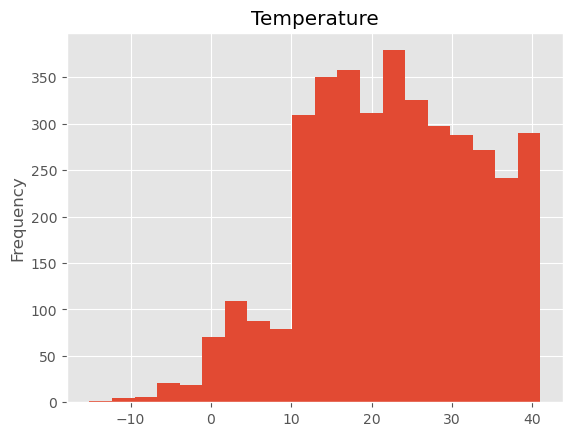

In [98]:
df['Temperature (C)']\
.plot(kind='hist', bins=20, title='Temperature')

In [99]:
df[binary_cols].sum()

nausea                     757
joint_pain                 326
abdominal_pain             195
high_fever                 506
chills                     311
fatigue                    604
runny_nose                 484
pain_behind_the_eyes       263
dizziness                  642
headache                   784
chest_pain                 369
vomiting                   616
cough                      298
shivering                    0
nasal_polyps               139
asthma                      98
high_blood_pressure        223
severe_headache            464
weakness                   177
trouble_seeing             184
fever                      155
body_aches                 166
sore_throat                318
sneezing                   174
diarrhea                   196
rapid_breathing             34
rapid_heart_rate           173
pain_behind_eyes            27
swollen_glands             171
rashes                     314
sinus_headache             152
facial_pain                171
shortnes

In [110]:
def classify_heat(temp):
    if temp >= 52:
        return 'Extreme Danger'
    elif temp >= 42:
        return 'Danger'
    elif temp >= 33:
        return 'Extreme Caution'
    elif temp >=27:
        return 'Caution'
    else:
        return 'Normal'

df.loc[:,'heat_risk'] = df['Temperature (C)'].apply(classify_heat)

In [101]:
prevalence = df.groupby('heat_risk')[binary_cols].mean().T
risk_order = ['Normal', 'Caution', 'Extreme Caution', 'Danger', 'Extreme Danger']
prevalence = prevalence.reindex(columns=risk_order)

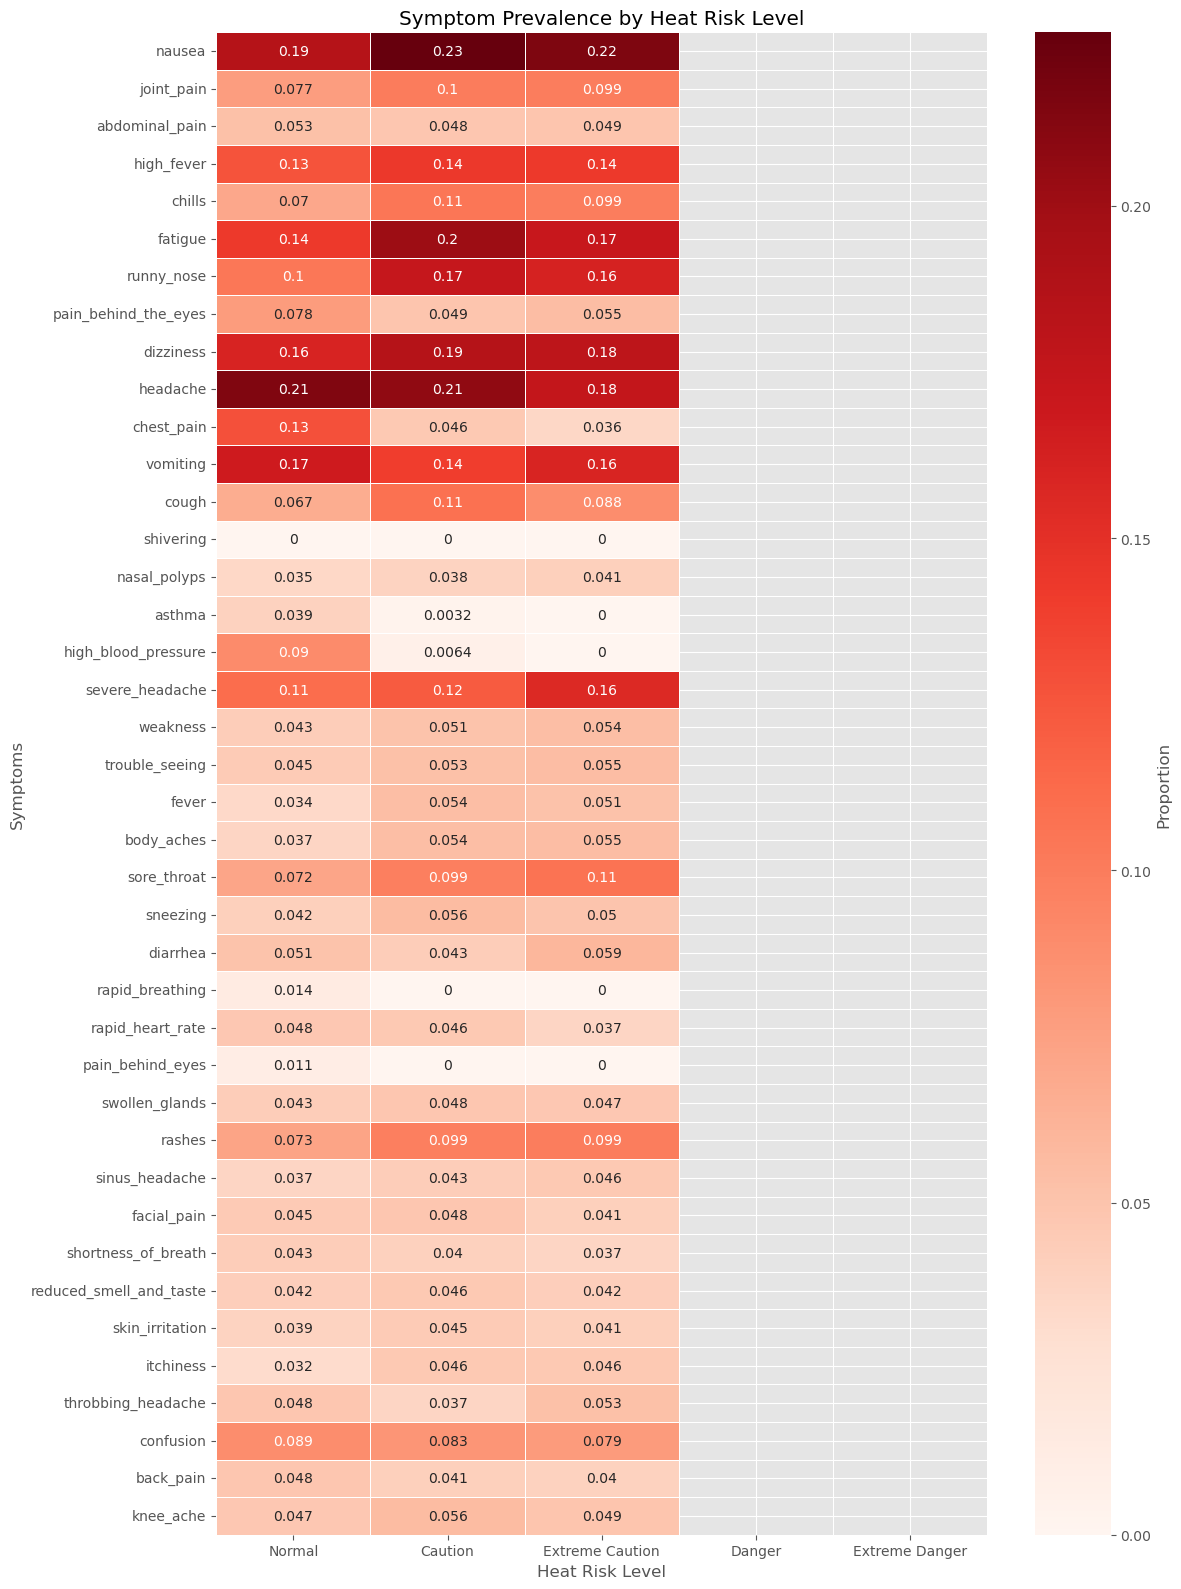

In [102]:
plt.figure(figsize=(12, 16))
sns.heatmap(prevalence, annot=True, cmap='Reds', linewidths=0.5, cbar_kws={'label': 'Proportion'})
plt.title('Symptom Prevalence by Heat Risk Level')
plt.xlabel('Heat Risk Level')
plt.ylabel('Symptoms')
plt.tight_layout()
plt.show()

In [103]:
print(df['heat_risk'].value_counts())

heat_risk
Normal             2433
Extreme Caution     758
Caution             628
Name: count, dtype: int64


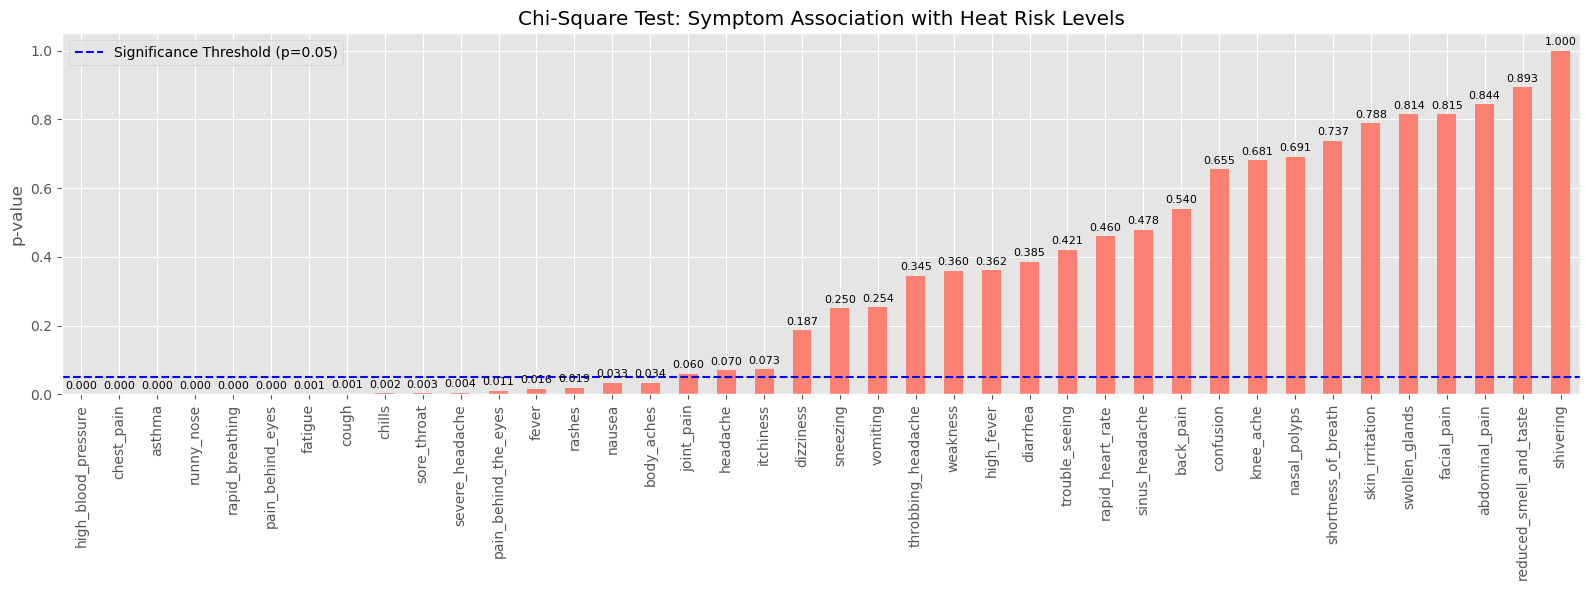

In [104]:
p_values = {}

for col in binary_cols:
    table = pd.crosstab(df['heat_risk'], df[col])
    chi2, p, _, _ = chi2_contingency(table)
    p_values[col] = p

pval_df = pd.Series(p_values).sort_values()

plt.figure(figsize=(16, 6))
bars = pval_df.plot(kind='bar', color='salmon')
plt.axhline(0.05, color='blue', linestyle='--', label='Significance Threshold (p=0.05)')
plt.ylabel('p-value')
plt.title('Chi-Square Test: Symptom Association with Heat Risk Levels')
plt.xticks(rotation=90)
plt.legend()
for i, value in enumerate(pval_df):
    plt.text(i, value + 0.01, f'{value:.3f}', ha='center', va='bottom', fontsize=8)
plt.tight_layout()
plt.show()